In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

from astropy.coordinates import ICRS, SkyCoord
from astropy import units as u

virgo_redshift = 0.0036 # from NED
dist_mod = 5.*np.log10(virgo_redshift*3.e5/70.*1.e6)-5

//anaconda/envs/astroconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)

In [7]:
# select galaxies near Virgo
raflag = (nsa.RA > 120.) & (nsa.RA < 240.) 
decflag= (nsa.DEC > -10.) & (nsa.DEC < 50.) 
velflag = (nsa.Z*3.e5 > 1000.) & (nsa.Z*3.e5 < 3000.)
vflag = raflag & decflag & velflag
vra=187.69708
vdec=12.33694
rad_distance = np.sqrt((nsa.RA - vra)**2+(nsa.DEC-vdec)**2)

In [19]:
cofile = 'tables/Jablonka-MasterFile-21Mar2017.fits'
co = fits.getdata(cofile)

In [8]:
nsacat = SkyCoord(nsa.RA*u.degree,nsa.DEC*u.degree,frame='icrs')
COcat = SkyCoord(co['ra']*u.degree,co['dec']*u.degree,frame='icrs')

# match CO catalog to NSA
index,dist2d,dist3d = nsacat.match_to_catalog_sky(COcat)

In [55]:
# only keep matches with matched RA and Dec w/in 10 arcsec
COflag = dist2d.degree < 10./3600# keep sources with matches w/in 10 arcsec
matchedCO10=np.zeros(len(nsa),dtype=co.dtype)
matchedCO10[COflag] = co[index[COflag]]

co_flag = matchedCO10['CO_DETECT'] == 1


filament = matchedCO10['filament'] != ''
print sum(co_flag),sum(filament)

158 176


In [31]:
sum(filament)

176

## Plot Galaxies with CO, Halpha Sources ##

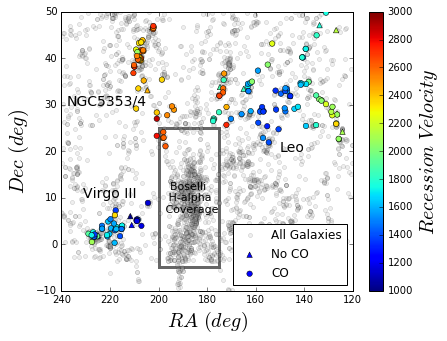

In [72]:
# color coded by recession velocity
fig=plt.figure(figsize=(6,5))
plt.plot(nsa.RA[vflag],nsa.DEC[vflag],'ko',c='0.7',markersize=4,alpha=0.2, label='All Galaxies')
plt.scatter(nsa.RA[filament & ~co_flag],nsa.DEC[filament & ~co_flag],c=nsa.Z[filament & ~co_flag]*3.e5,marker='^',zorder=20,s=30,vmin=1000,vmax=3000,lw=0.5,label='No CO')

plt.scatter(nsa.RA[co_flag],nsa.DEC[co_flag],c=nsa.Z[co_flag]*3.e5,zorder=20,s=30,vmin=1000,vmax=3000,lw=0.5,label='CO')

# plot CO sources
# plt.plot(nsa.RA[co_flag],nsa.DEC[co_flag],'go',mec='k',mfc='None',markersize=14)


plt.legend(numpoints=1,scatterpoints=1,loc='lower right')
# EVCC rectangle
ra_min=175
dec_min=-5
dra=25
ddec=30
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='0.4',lw=3)
fig.gca().add_artist(rect)
plt.text(187,12,'Boselli \n H-alpha \n Coverage',fontsize=11,color='k',horizontalalignment='center',verticalalignment='center')
#plt.arrow(180, -7, -5., 5, head_width=1, head_length=1, fc='k', ec='k')
#cb=plt.colorbar(fraction=.08)
#plt.gca().annotate("", xy=(185, -1.5), xytext=(180, -7),arrowprops=dict(arrowstyle="->"))
# global area of interest
ra_min=192
dec_min=17
dra=20
ddec=32
rect= plt.Rectangle((ra_min,dec_min), dra, ddec,fill=False, color='k',lw=3)
#fig.gca().add_artist(rect)
cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.text(205,30,'NGC5353/4',fontsize=14,horizontalalignment='right')
#plt.text(200,45,'Canes Venatici',fontsize=14,horizontalalignment='left')
plt.text(220,10,'Virgo III',fontsize=14,horizontalalignment='center')
plt.text(150,20,'Leo',fontsize=14,horizontalalignment='left')
plt.axis([120,240,-10,50])
plt.gca().invert_xaxis()
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
plt.savefig('plots/filaments-for-issi-prop.png')